# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

<b>"To whom are you communicating?"</b>
- My primary audience is cybersecurity professionals

<b>"What do you want your audience to know and do?"</b>
- Adopt AI driven intrusion detection systems

<b>"How can you use data to help make your point?"</b>
- After building an AI-based IDS model, compare and contrast to traditional IDS performance

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


In [2]:
cyber_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/cyber_security_attacks/cybersecurity_attacks.csv')
beth_df = pd.read_csv('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/beth_dataset/labelled_training_data.csv')
UNSW_df = pd.read_parquet('/Users/mickalangelo/Desktop/BU docs/Projects/cyber_projects/UNSW-NB15 dataset/UNSW_NB15_training-set.parquet')

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
# This function will list how many nulls occur in which features
# Function credited to Prof. Snyder

def show_null_counts_features(df):
    # Count the nulls and calculate the %
    count_nulls = df.isnull().sum()
    df_nulls = (df.isnull().mean() * 100).round(2)
    
    # Determine if the column is numeric or non-numeric
    feature_types = df.dtypes.apply(lambda x: 'Numeric' if pd.api.types.is_numeric_dtype(x) else 'Categorical')
    
    # Filter out the columns with missing values and sort them in descending order
    missing_data = pd.DataFrame({
        'Feature': count_nulls[count_nulls > 0].index,
        '# Null Values': count_nulls[count_nulls > 0].values, 
        'Null %': df_nulls[df_nulls > 0].values,
        'Type': feature_types[count_nulls > 0].values
    }).sort_values(by='Null %', ascending=False)
    
    print(f'The dataset contains {len(df)} samples.\n')

    if (len(missing_data) == 0):
        print("There are no null values in the dataset!")
    else:
        # Print null value stats
        print('Feature Name    # Nulls      Null %    Type')
        print('------------    -------      ------    ----')
        for index, row in missing_data.iterrows():
            print(f"{row['Feature']:<15} {row['# Null Values']:<12} {row['Null %']:.2f}%   {row['Type']}")

In [4]:

def calculate_summary_stats(df: pd.DataFrame) -> pd.DataFrame:
    
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    
    # Compute mean, median, and mode for numeric columns.
    mean = df_numeric.mean()
    median = df_numeric.median()
    # In case of multiple modes, we select the first one for each column.
    mode = df_numeric.mode().iloc[0]
    
    # Combine the results into a single DataFrame
    stats_df = pd.DataFrame({
        'mean': mean,
        'median': median,
        'mode': mode
    })
    
    return stats_df

## Cybersecurity Attacks Dataset

In [5]:
cyber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [6]:
cyber_df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [7]:
show_null_counts_features(cyber_df)

The dataset contains 40000 samples.

Feature Name    # Nulls      Null %    Type
------------    -------      ------    ----
Alerts/Warnings 20067        50.17%   Categorical
IDS/IPS Alerts  20050        50.12%   Categorical
Malware Indicators 20000        50.00%   Categorical
Firewall Logs   19961        49.90%   Categorical
Proxy Information 19851        49.63%   Categorical


In [16]:
cyber_df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected    20000
Name: count, dtype: int64

In [ ]:
cyber_df.duplicated().sum()

0

In [ ]:
calculate_summary_stats(cyber_df)

,mean,median,mode
Source Port,32970.356450,32856.000,41341.00
Destination Port,33150.868650,33004.500,7508.00
Packet Length,781.452725,782.000,1037.00
Anomaly Scores,50.113473,50.345,15.39


In [ ]:
cyber_df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [ ]:
cyber_df_no_timestamp = cyber_df.drop('Timestamp', axis=1)

In [ ]:
# cyber_df_no_timestamp = pd.get_dummies(cyber_df_no_timestamp, drop_first=True).astype(int)
# cyber_df_no_timestamp

---

## UNSW Attacks Dataset

In [ ]:
UNSW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                175341 non-null  float32 
 1   proto              175341 non-null  category
 2   service            175341 non-null  category
 3   state              175341 non-null  category
 4   spkts              175341 non-null  int16   
 5   dpkts              175341 non-null  int16   
 6   sbytes             175341 non-null  int32   
 7   dbytes             175341 non-null  int32   
 8   rate               175341 non-null  float32 
 9   sload              175341 non-null  float32 
 10  dload              175341 non-null  float32 
 11  sloss              175341 non-null  int16   
 12  dloss              175341 non-null  int16   
 13  sinpkt             175341 non-null  float32 
 14  dinpkt             175341 non-null  float32 
 15  sjit               175341 non-null

In [ ]:
UNSW_df.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,...,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,95406.179688,7.345403e+07,6.712055e+05,4.953000,6.948010,...,124.173382,0.105982,2.144292e+03,5.383538,4.206255,0.014948,0.014948,0.133066,0.015752,0.680622
std,6.483313,136.887597,110.258271,1.747656e+05,1.436542e+05,165417.671875,1.883701e+08,2.423637e+06,66.005059,52.732999,...,258.317056,0.776911,5.420797e+04,8.047104,5.783585,0.126048,0.126048,0.701208,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,32.786140,1.305334e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3225.806641,8.796748e+05,1.447023e+03,0.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,125000.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,...,89.000000,0.000000,0.000000e+00,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1000000.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,...,1458.000000,172.000000,6.558056e+06,51.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000


In [ ]:
show_null_counts_features(UNSW_df)

The dataset contains 175341 samples.

There are no null values in the dataset!


In [ ]:
UNSW_df.duplicated().sum()

78519

In [ ]:
calculate_summary_stats(UNSW_df)

,mean,median,mode
dur,1.359389e+00,0.001582,9.000000e-06
spkts,2.029866e+01,2.000000,2.000000e+00
dpkts,1.896959e+01,2.000000,0.000000e+00
sbytes,8.844844e+03,430.000000,1.140000e+02
dbytes,1.492892e+04,164.000000,0.000000e+00
rate,9.540618e+04,3225.806641,1.111111e+05
sload,7.345403e+07,879674.750000,5.066666e+07
dload,6.712055e+05,1447.022705,0.000000e+00
sloss,4.953000e+00,0.000000,0.000000e+00
dloss,6.948010e+00,0.000000,0.000000e+00


### Categorical Variables

In [ ]:
print(f"Number of categories in Proto column: {len(UNSW_df['proto'].value_counts())}")
print(f"Number of categories in Service column: {len(UNSW_df['service'].value_counts())}")
print(f"Number of categories in State column: {len(UNSW_df['state'].value_counts())}")
print(f"Number of categories in Attack_cat column: {len(UNSW_df['attack_cat'].value_counts())}")

Number of categories in Proto column: 133
Number of categories in Service column: 13
Number of categories in State column: 9
Number of categories in Attack_cat column: 10


When returning the columns as one hot encoded, we will be including drop_first=True to avoid multicollinearity.

In [ ]:
UNSW_df = pd.get_dummies(UNSW_df, drop_first=True).astype(int)
UNSW_df

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,state_no,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Shellcode,attack_cat_Worms
0,0,6,4,258,172,74,14158,8495,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,14,38,734,42014,78,8395,503571,2,17,...,0,0,0,0,0,0,1,0,0,0
2,1,8,16,364,13186,14,1572,60929,1,6,...,0,0,0,0,0,0,1,0,0,0
3,1,12,12,628,770,13,2740,3358,1,3,...,0,0,0,0,0,0,1,0,0,0
4,0,10,6,534,268,33,8561,3987,2,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0,2,0,114,0,111111,50666664,0,0,0,...,0,0,0,0,0,1,0,0,0,0
175337,0,10,8,620,354,33,8826,4903,2,1,...,0,0,0,0,0,0,0,0,1,0
175338,0,2,0,114,0,111111,50666664,0,0,0,...,0,0,0,0,0,1,0,0,0,0
175339,0,2,0,114,0,111111,50666664,0,0,0,...,0,0,0,0,0,1,0,0,0,0


---

## BETH Dataset

In [ ]:
beth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763144 entries, 0 to 763143
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        763144 non-null  float64
 1   processId        763144 non-null  int64  
 2   threadId         763144 non-null  int64  
 3   parentProcessId  763144 non-null  int64  
 4   userId           763144 non-null  int64  
 5   mountNamespace   763144 non-null  int64  
 6   processName      763144 non-null  object 
 7   hostName         763144 non-null  object 
 8   eventId          763144 non-null  int64  
 9   eventName        763144 non-null  object 
 10  stackAddresses   763144 non-null  object 
 11  argsNum          763144 non-null  int64  
 12  returnValue      763144 non-null  int64  
 13  args             763144 non-null  object 
 14  sus              763144 non-null  int64  
 15  evil             763144 non-null  int64  
dtypes: float64(1), int64(10), object(5)
me

In [ ]:
print(f"Number of categories in processName column: {len(beth_df['processName'].value_counts())}")
print(f"Number of categories in hostName column: {len(beth_df['hostName'].value_counts())}")
print(f"Number of categories in eventName column: {len(beth_df['eventName'].value_counts())}")
print(f"Number of categories in stackAddresses column: {len(beth_df['stackAddresses'].value_counts())}")
print(f"Number of categories in args column: {len(beth_df['args'].value_counts())}")

Number of categories in processName column: 36
Number of categories in hostName column: 8
Number of categories in eventName column: 32
Number of categories in stackAddresses column: 97050
Number of categories in args column: 214720


In [ ]:
beth_df_no_timestamp = beth_df.drop('timestamp', axis=1)

In [ ]:
# beth_df_no_timestamp = pd.get_dummies(beth_df_no_timestamp, drop_first=True).astype(int)
# beth_df_no_timestamp

In [ ]:
beth_df['processName'].value_counts()

processName
ps                 406313
systemd-udevd      189292
sshd                91762
systemd-journal     20421
systemd             17310
systemd-tmpfile     13014
amazon-ssm-agen      4850
snapd                4187
cron                 4080
systemd-resolve      3398
systemd-user-ru      1276
systemd-timesyn      1208
systemd-network      1112
(tmpfiles)           1008
ssm-agent-worke       822
poweroff              754
(time-dir)            702
systemd-logind        602
(sd-sync)             523
sh                    119
run-parts             112
journal-offline        96
kworker/dying          76
close                  36
packagekitd            14
dbus-daemon            11
gmain                   7
gdbus                   7
atd                     6
dockerd                 5
docker                  5
containerd-shim         5
kworker/u30:1           4
(sd-pam)                4
kworker/u30:0           2
kworker/u30:2           1
Name: count, dtype: int64

In [ ]:
beth_df.describe()

,timestamp,processId,threadId,parentProcessId,userId,mountNamespace,eventId,argsNum,returnValue,sus,evil
count,763144.000000,763144.000000,763144.000000,763144.000000,763144.000000,7.631440e+05,763144.000000,763144.000000,763144.000000,763144.000000,763144.0
mean,1844.582673,6814.763308,6820.265241,1882.216609,2.279034,4.026532e+09,288.158953,2.672082,17.520924,0.001663,0.0
std,1136.638249,1948.871187,1937.068333,2215.563094,37.416576,1.649030e+02,385.117778,1.340906,318.596662,0.040744,0.0
min,132.560721,1.000000,1.000000,0.000000,0.000000,4.026532e+09,3.000000,0.000000,-115.000000,0.000000,0.0
25%,903.250802,7313.000000,7313.000000,187.000000,0.000000,4.026532e+09,3.000000,1.000000,0.000000,0.000000,0.0
50%,1829.203642,7365.000000,7365.000000,1385.000000,0.000000,4.026532e+09,62.000000,3.000000,0.000000,0.000000,0.0
75%,2761.380825,7415.000000,7415.000000,1648.000000,0.000000,4.026532e+09,257.000000,4.000000,4.000000,0.000000,0.0
max,3954.587643,8619.000000,8619.000000,7672.000000,1000.000000,4.026532e+09,1010.000000,5.000000,8289.000000,1.000000,0.0


In [ ]:
show_null_counts_features(beth_df)

The dataset contains 763144 samples.

There are no null values in the dataset!


In [ ]:
beth_df.duplicated().sum()

0

In [ ]:
calculate_summary_stats(beth_df)

,mean,median,mode
timestamp,1.844583e+03,1.829204e+03,1.336587e+02
processId,6.814763e+03,7.365000e+03,1.590000e+02
threadId,6.820265e+03,7.365000e+03,1.590000e+02
parentProcessId,1.882217e+03,1.385000e+03,1.870000e+02
userId,2.279034e+00,0.000000e+00,0.000000e+00
mountNamespace,4.026532e+09,4.026532e+09,4.026532e+09
eventId,2.881590e+02,6.200000e+01,3.000000e+00
argsNum,2.672082e+00,3.000000e+00,4.000000e+00
returnValue,1.752092e+01,0.000000e+00,0.000000e+00
sus,1.662858e-03,0.000000e+00,0.000000e+00


## Conclusions

<b>Are the data usable?  If not, find some new data!</b>
- Yes, however the orginal UNSW dataset may be more useful

<b>Do you need to modify or correct the data in some way?</b>
- Yes, the Cybersecurity dataset requires addressing null values. My understading is that they are not acutally nulls, rather they are simply not recorded

<b>Is there any class imbalance?  (Categories that have many more items than other categories).</b>
- Yes howevre, given that the data contains cyber attack and intrusion data in which anamolies are rare, this is to be expected

---

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

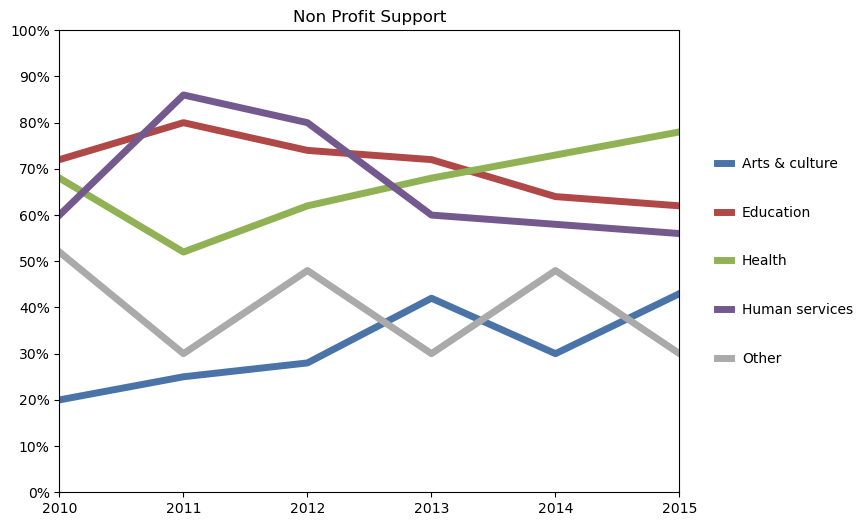

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

chart_data = {
    "Arts & culture":{2010:20, 2011:25, 2012:28, 2013:42, 2014:30, 2015:43},
    "Education":{2010:72, 2011:80, 2012:74, 2013:72, 2014:64, 2015:62},
    "Health":{2010:68, 2011:52, 2012:62, 2013:68, 2014:73, 2015:78},
    "Human services":{2010:60, 2011:86, 2012:80, 2013:60,2014:58,2015:56},
    "Other":{2010:52, 2011:30, 2012:48, 2013:30, 2014:48, 2015:30}
}

colors = {
    "Arts & culture": "#4a74a8",
    "Education": "#af4846",
    "Health": "#90b254",
    "Human services": "#74598e",
    "Other": "#a9aaa9",
}

chart_data_df = pd.DataFrame(chart_data)

plt.figure(figsize=(8,6))

for column in chart_data_df.columns:
    plt.plot(chart_data_df.index, chart_data_df[column], linestyle='-', linewidth=5, label=column, color=colors[column])

plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

plt.margins(x=0)
plt.yticks(range(0, 101, 10))
plt.title("Non Profit Support")
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.5), labelspacing=2.5, handlelength=1).get_frame().set_visible(False)
plt.show()